# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [18]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 
from skimage import morphology
from skimage import filters
from scipy import ndimage
# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

Text(0.5,1,'Filtered image radius=7')

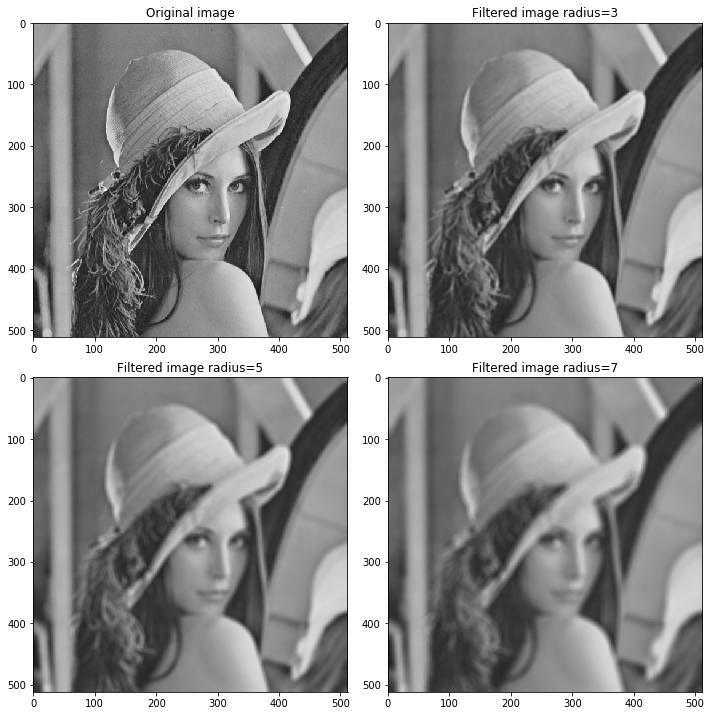

In [4]:
# Open image
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)

# Create disks
disk3 = morphology.disk(3)
disk5 = morphology.disk(5)
disk7 = morphology.disk(7)

# Filtering
lena_filtered_r3 = filters.rank.mean(lena_im, disk3)
lena_filtered_r5 = filters.rank.mean(lena_im, disk5)
lena_filtered_r7 = filters.rank.mean(lena_im, disk7)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show smoothed images
plt.subplot (222)
io.imshow(lena_filtered_r3)
plt.title ('Filtered image radius=3')

plt.subplot (223)
io.imshow(lena_filtered_r5)
plt.title ('Filtered image radius=5')

plt.subplot (224)
io.imshow(lena_filtered_r7)
plt.title ('Filtered image radius=7')


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

Text(0.5,1,'Filtered image mask size=7')

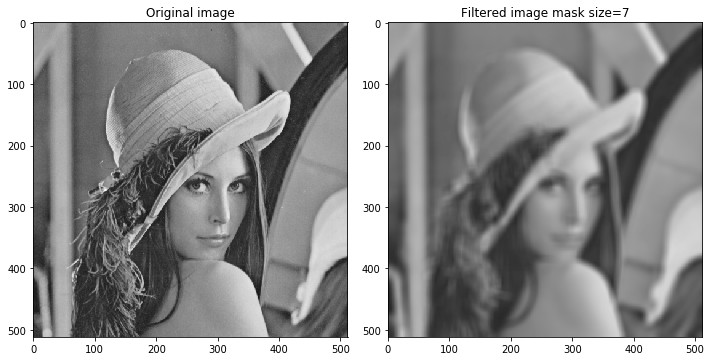

In [21]:
# Create mask
mask_7 = (1./(14.*14.))*np.ones((14,14))

# Apply the filter using convolution
lena_filtered_7_conv = ndimage.filters.convolve(lena_im, mask_7)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show smoothed image
plt.subplot (222)
io.imshow(lena_filtered_7_conv)
plt.title ('Filtered image mask size=7')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [6]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

Text(0.5,1,'Filtered image using Scharr')

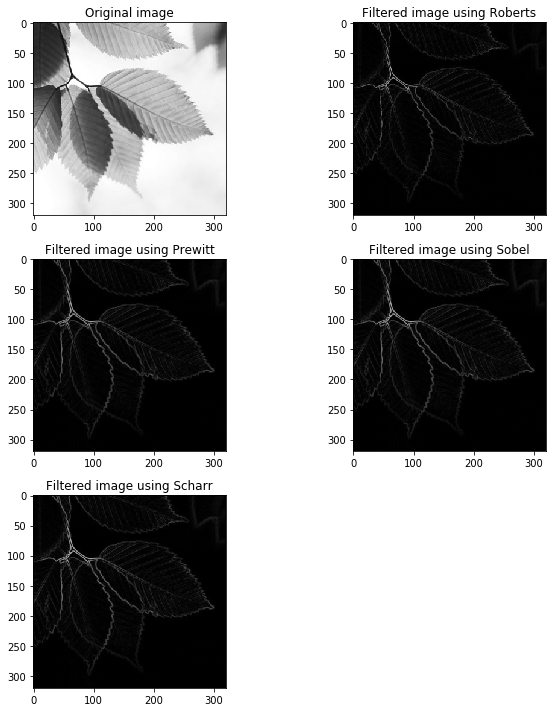

In [26]:
# Open image
filename = './images/leaves.jpg'
leaves_im = io.imread(filename, as_grey=True)

# Apply filters
leaves_filt_roberts = filters.roberts(leaves_im)
leaves_filt_prewitt = filters.prewitt(leaves_im)
leaves_filt_sobel = filters.sobel(leaves_im)
leaves_filt_scharr = filters.scharr(leaves_im)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (321)
io.imshow(leaves_im)
plt.title('Original image')

# Show Roberts
plt.subplot (322)
io.imshow(leaves_filt_roberts)
plt.title ('Filtered image using Roberts')

# Show Prewitt
plt.subplot (323)
io.imshow(leaves_filt_prewitt)
plt.title ('Filtered image using Prewitt')

# Show Sobel
plt.subplot (324)
io.imshow(leaves_filt_sobel)
plt.title ('Filtered image using Sobel')

# Show Scharr
plt.subplot (325)
io.imshow(leaves_filt_scharr)
plt.title ('Filtered image using Scharr')

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

Text(0.5,1,'Angle after Sobel filtering')

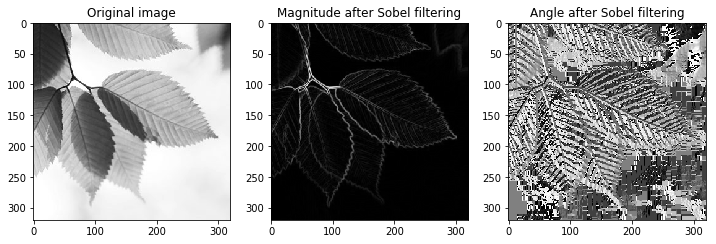

In [38]:
# Define the sobel filters
Sx = [[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]
Sx = (1./4.)*np.array(Sx)
Sy = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
Sy = (1./4.)*np.array(Sy)

# Apply the filter using convolution
leaves_Sx = ndimage.filters.convolve(leaves_im, Sx)
leaves_Sy = ndimage.filters.convolve(leaves_im, Sy)

# Find magnitude
leaves_mag = np.sqrt(leaves_Sx**2. + leaves_Sy**2.)
leaves_ang = np.arctan2(leaves_Sy,leaves_Sx)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (131)
io.imshow(leaves_im)
plt.title('Original image')

# Show magnitude
plt.subplot (132)
io.imshow(leaves_mag, cmap='gray')
plt.title ('Magnitude after Sobel filtering')

# Show angle
plt.subplot (133)
plt.imshow(leaves_ang, cmap='gray')
plt.title ('Angle after Sobel filtering')



### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

Text(0.5,1,'Filtered image using Laplace')

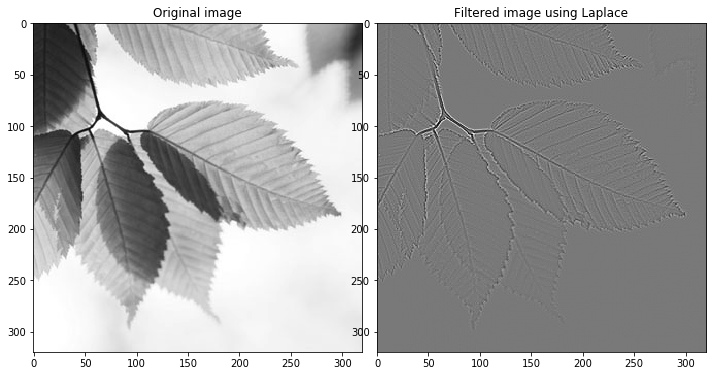

In [43]:
# Apply laplace filter
leaves_laplace = filters.laplace(leaves_im)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (121)
io.imshow(leaves_im)
plt.title('Original image')

# Show magnitude
plt.subplot (122)
plt.imshow(leaves_laplace, cmap= 'gray')
plt.title ('Filtered image using Laplace')

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

Text(0.5,1,'Filtered image using Laplace, f=0.5')

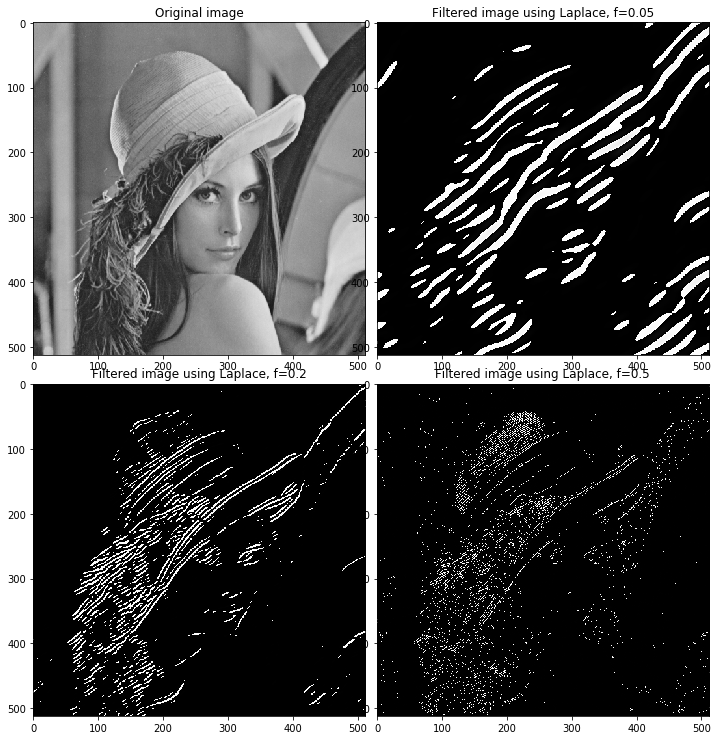

In [55]:
# Apply Gabor filter f=0.05, theta=60
lena_laplace_real_f1, lena_laplace_im = filters.gabor(lena_im, 0.05, 1.0472)

# Apply Gabor filter f=0.2, theta=60
lena_laplace_real_f2, lena_laplace_im = filters.gabor(lena_im, 0.2, 1.0472)

# Apply Gabor filter f=0.5, theta=60
lena_laplace_real_f3, lena_laplace_im = filters.gabor(lena_im, 0.5, 1.0472)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show magnitude f=0.05
plt.subplot (222)
plt.imshow(lena_laplace_real_f1, cmap='gray')
plt.title ('Filtered image using Laplace, f=0.05')

# Show magnitude f=0.2
plt.subplot (223)
plt.imshow(lena_laplace_real_f2, cmap='gray')
plt.title ('Filtered image using Laplace, f=0.2')

# Show magnitude f=0.5
plt.subplot (224)
plt.imshow(lena_laplace_real_f3, cmap='gray')
plt.title ('Filtered image using Laplace, f=0.5')

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [56]:
from skimage import util

Text(0.5,1,'Image corrupted by Speckle noise')

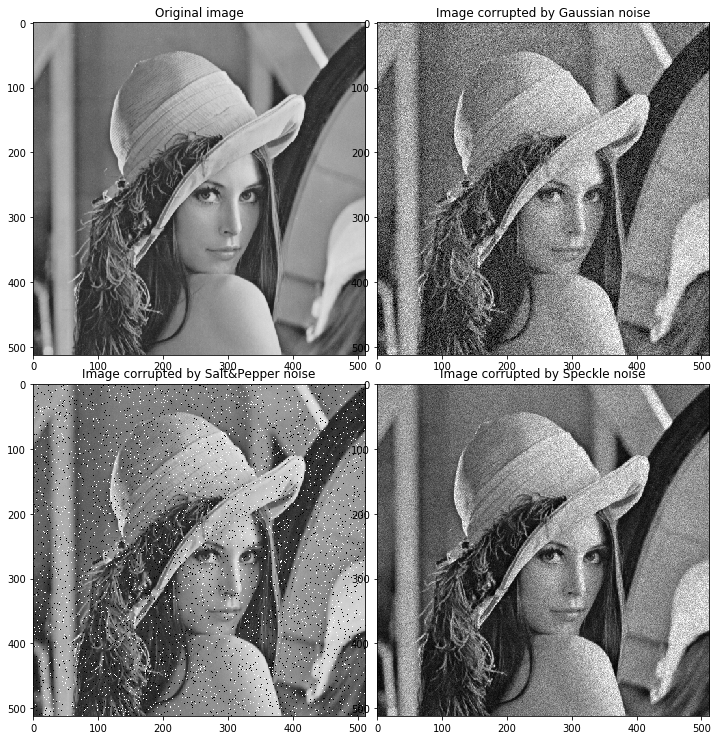

In [63]:
# Generate noisy images
lena_gaussian = util.random_noise(lena_im, 'gaussian')
lena_salt = util.random_noise(lena_im, 's&p') 
lena_speckle = util.random_noise(lena_im, 'speckle')

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show magnitude f=0.05
plt.subplot (222)
plt.imshow(lena_gaussian, cmap='gray')
plt.title ('Image corrupted by Gaussian noise')

# Show magnitude f=0.2
plt.subplot (223)
plt.imshow(lena_salt, cmap='gray')
plt.title ('Image corrupted by Salt&Pepper noise')

# Show magnitude f=0.5
plt.subplot (224)
plt.imshow(lena_speckle, cmap='gray')
plt.title ('Image corrupted by Speckle noise')


**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

C:\Users\dono_\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Denoised splecke')

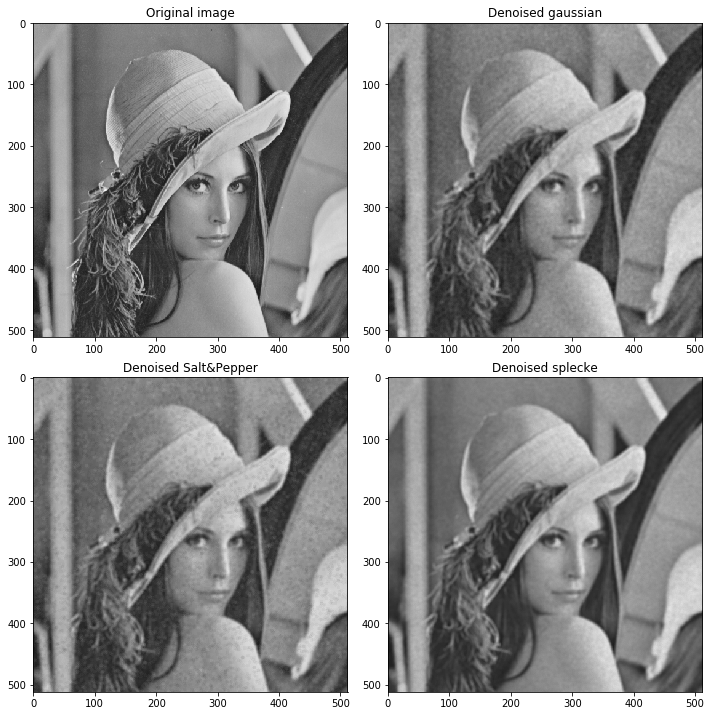

In [65]:
# Filtering disk radius=3
lena_gaussian_filt_r3 = filters.rank.mean(lena_gaussian, disk3)
lena_salt_filt_r3 = filters.rank.mean(lena_salt, disk3)
lena_speckle_filt_r3 = filters.rank.mean(lena_speckle, disk3)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show filtered gaussian noisy image
plt.subplot (222)
io.imshow(lena_gaussian_filt_r3)
plt.title('Denoised gaussian')

# Show filtered salt&pepper noisy image
plt.subplot (223)
io.imshow(lena_salt_filt_r3)
plt.title('Denoised Salt&Pepper')

# Show filtered speckle noisy image
plt.subplot (224)
io.imshow(lena_speckle_filt_r3)
plt.title('Denoised splecke')

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\dono_\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Denoised splecke')

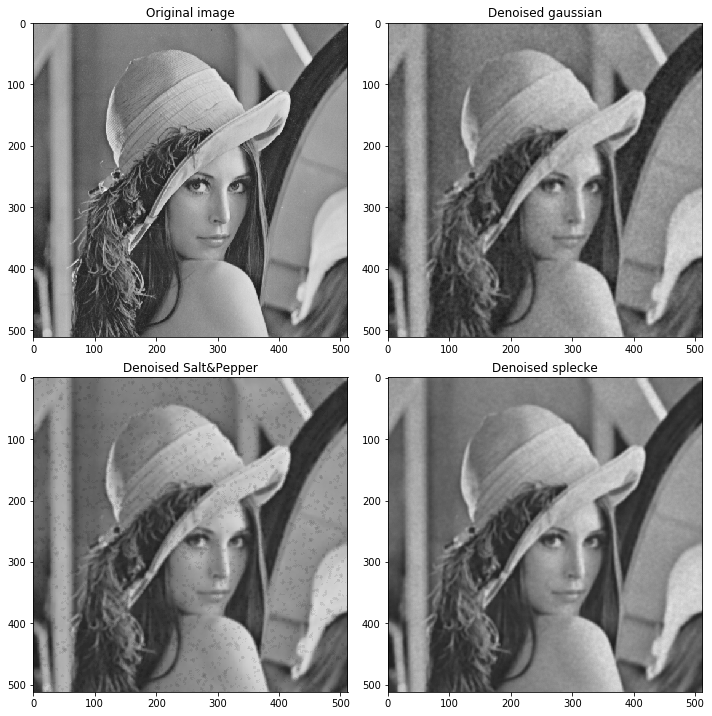

In [70]:
# Filtering disk radius=3
lena_gaussian_filt_alpha = filters.rank.mean_percentile(lena_gaussian, disk3, p0=0.05, p1=0.95)
lena_salt_filt_alpha = filters.rank.mean_percentile(lena_salt, disk3, p0=0.05, p1=0.95)
lena_speckle_filt_alpha = filters.rank.mean_percentile(lena_speckle, disk3, p0=0.05, p1=0.95)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(lena_im)
plt.title('Original image')

# Show filtered gaussian noisy image
plt.subplot (222)
io.imshow(lena_gaussian_filt_alpha)
plt.title('Denoised gaussian')

# Show filtered salt&pepper noisy image
plt.subplot (223)
io.imshow(lena_salt_filt_alpha)
plt.title('Denoised Salt&Pepper')

# Show filtered speckle noisy image
plt.subplot (224)
io.imshow(lena_speckle_filt_alpha)
plt.title('Denoised splecke')

** Q.7.3 median filter: **

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**